<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/Structured_Dataset/blob/main/coil_dataset_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Protein localization sites dataset:
####Build and train models for multi-class categorization.
---
>❏ Plot loss and accuracy of a trained model.

>❏ Identify strategies to prevent overfitting, including augmentation and dropout.

>❏ Use pretrained models (transfer learning).

>❏ Extract features from pre-trained models.

>❏ Ensure that inputs to a model are in the correct shape.

>❏ Ensure that you can match test data to the input shape of a neural network.

>❏ Ensure you can match output data of a neural network to specified input 
shape for test data.

>❏ Understand batch loading of data.

>❏ Use callbacks to trigger the end of training cycles.

>❏ Use datasets from different sources.

>❏ Use datasets in different formats, including json and csv.

In [64]:
# import function as:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
tf.__version__

'2.8.0'

In [105]:
!nvidia-smi  -L

GPU 0: Tesla T4 (UUID: GPU-b62941f1-dbf9-7d80-d14f-9dd599b44635)


In [107]:
## calling the data file :
dataset=pd.read_csv("/content/coil_file.csv",header=None)
dataset.head()

,0,1,2,3,4,5,6,7
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [108]:
from pandas import set_option
# describe the dataset
set_option('precision', 4)
print(dataset.describe())

              0         1         2         3         4         5         6
count  336.0000  336.0000  336.0000  336.0000  336.0000  336.0000  336.0000
mean     0.5001    0.5000    0.4955    0.5015    0.5000    0.5002    0.4997
std      0.1946    0.1482    0.0885    0.0273    0.1224    0.2158    0.2094
min      0.0000    0.1600    0.4800    0.5000    0.0000    0.0300    0.0000
25%      0.3400    0.4000    0.4800    0.5000    0.4200    0.3300    0.3500
50%      0.5000    0.4700    0.4800    0.5000    0.4950    0.4550    0.4300
75%      0.6625    0.5700    0.4800    0.5000    0.5700    0.7100    0.7100
max      0.8900    1.0000    1.0000    1.0000    0.8800    1.0000    0.9900


In [109]:
from collections import Counter  #Counter is a sub-class that is used to count hashable objects. It implicitly creates a hash table of an iterable when invoked.

target=dataset.values[:,-1]
Counter=Counter(target)
print(Counter)

## itrerating over counter 
for k,v in Counter.items():
    percent = v / len(target) * 100
    print(f'Class={k}, Count={v}, Percentage=%.2f%%'%( percent))

Counter({'cp': 143, 'im': 77, 'pp': 52, 'imU': 35, 'om': 20, 'omL': 5, 'imS': 2, 'imL': 2})
Class=cp, Count=143, Percentage=42.56%
Class=im, Count=77, Percentage=22.92%
Class=imS, Count=2, Percentage=0.60%
Class=imL, Count=2, Percentage=0.60%
Class=imU, Count=35, Percentage=10.42%
Class=om, Count=20, Percentage=5.95%
Class=omL, Count=5, Percentage=1.49%
Class=pp, Count=52, Percentage=15.48%


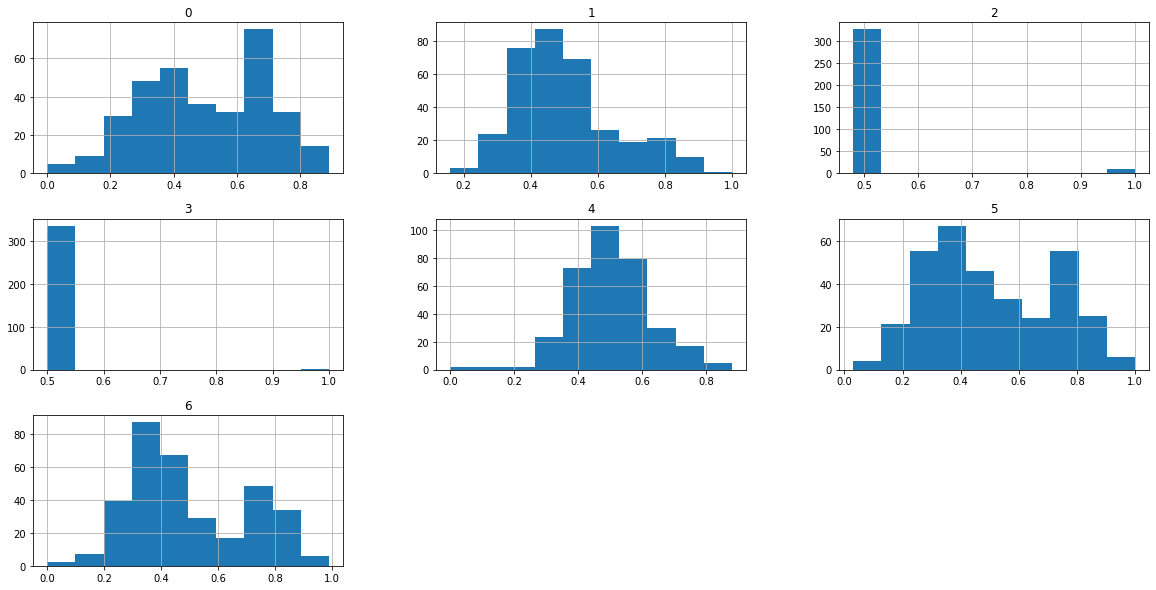

In [110]:
# create a histogram plot of each variable
dataset.hist(figsize=(20,10))
plt.show()

###Setting the data for tain and test

In [113]:
from sklearn.preprocessing import LabelEncoder

label=dataset.values[:,-1]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(label)
encoded_Y = encoder.transform(label)

encoder,encoded_Y

(LabelEncoder(),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        3, 3, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7,
        7, 7, 7, 7, 7

In [114]:
## convert the data into one hot endcoder to label which need to be predicted:
from sklearn.preprocessing import OneHotEncoder

label_reshape=tf.reshape(label,[-1,1])
OneHotEncode= OneHotEncoder(sparse=False)
labels= OneHotEncode.fit_transform(label_reshape)

labels[:2],labels.shape

(array([[1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.]]), (336, 8))

In [115]:
# retrieve numpy array:
feature_data= dataset.values[:, :-1]
# split into input and output elements:

x=feature_data.astype(float)
y= labels
print(x.shape,y.shape)
x[0],y[0]

(336, 7) (336, 8)


(array([0.49, 0.29, 0.48, 0.5 , 0.56, 0.24, 0.35]),
 array([1., 0., 0., 0., 0., 0., 0., 0.]))

### Spliting the data for train and Test:

In [116]:
#split into input and output elements
split_data=int(len(dataset)*.80)

x_train,y_train = x[:split_data],y[:split_data]
x_test,y_test   = x[split_data:],y[split_data:]

# Notice the normalized/one-hot encoded shape is larger because of the extra columns

print(x_train.shape, y_train.shape,x_test.shape,y_test.shape)
print(x_train.dtype, y_train.dtype,x_test.dtype,y_test.dtype)
x_train[0],y_train[0]

(268, 7) (268, 8) (68, 7) (68, 8)
float64 float64 float64 float64


(array([0.49, 0.29, 0.48, 0.5 , 0.56, 0.24, 0.35]),
 array([1., 0., 0., 0., 0., 0., 0., 0.]))

### Setting the callback function:

In [117]:
## callback
# Create a function to implement a ModelCheckpoint callback with a specific filename 
callbacks= tf.keras.callbacks.ModelCheckpoint(filepath=("/content/callback/dataset_banknote_model"), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

# Create a function to implement a Earlystop callback with loss monitor)
Early_stop=tf.keras.callbacks.EarlyStopping( monitor='loss',
                                             patience=10,
                                             verbose=0)

###Build TensorFlow input pipelines:

In [118]:
## pipeline
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset=   tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset,test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None, 8), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None, 8), dtype=tf.float64, name=None))>)

In [119]:
# build the model with 3 layers:
model=tf.keras.Sequential([ 
                            tf.keras.layers.Dense(32,activation="relu"),
                            tf.keras.layers.Dense(128,activation="relu"),
                            tf.keras.layers.Dense(128,activation="relu"),
                            tf.keras.layers.Dense(8,activation="softmax")
                                      ])


# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["accuracy"])

# Fit the model for 200
history=model.fit(train_dataset,
                        batch_size=5,
                        epochs=100,
                        verbose=1,
                         callbacks=[Early_stop])

Epoch 1/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6686 - accuracy: 0.2985
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 0.5903 - accuracy: 0.5336
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 0.4946 - accuracy: 0.5336
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 0.3880 - accuracy: 0.5336
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 0.3109 - accuracy: 0.5336
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.2740 - accuracy: 0.5336
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 0.2574 - accuracy: 0.5336
Epoch 8/100
9/9 [==============================] - 0s 3ms/step - loss: 0.2491 - accuracy: 0.5336
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 0.2446 - accuracy: 0.5336
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: 0.2411 - accuracy: 0.5336
Epoch 11/100
9/9 [===========

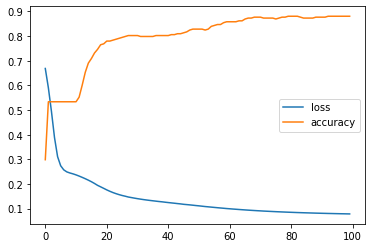

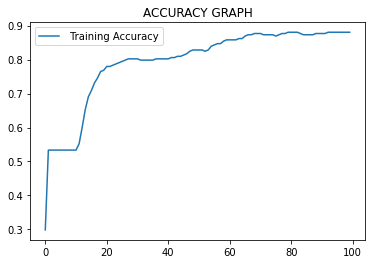

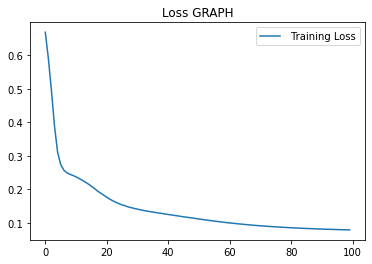

In [124]:
pd.DataFrame(history.history).plot();
# ploting Graphs seperately for better understanding 

# Accuracy
accuracy=history.history['accuracy']
# Loss and 
loss=history.history['loss']

# Acc and val_Acc plot:
plt.figure()
plt.plot(accuracy,label=' Training Accuracy')
plt.title('ACCURACY GRAPH')
plt.legend()

# loss and Val_loss graphs:
plt.figure()
plt.plot(loss,label=' Training Loss')
plt.title('Loss GRAPH')
plt.legend();

In [98]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 32)                256       
                                                                 
 dense_20 (Dense)            (None, 128)               4224      
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 8)                 1032      
                                                                 
Total params: 22,024
Trainable params: 22,024
Non-trainable params: 0
_________________________________________________________________


In [129]:
## model prediction on x_dataset
model_preds=model.predict(test_data)
preds=tf.math.round(model_preds)
preds[1:20],y_test[1:20]

NameError: ignored

In [130]:
###one hot reverse fot x_true
one_hot_inverse_true=pd.DataFrame(y_test).idxmax(1)
y_true=encoder.inverse_transform(one_hot_inverse_true)
len(y_true),y_true[11:20]

(68, array(['omL', 'omL', 'omL', 'omL', 'omL', 'pp', 'pp', 'pp', 'pp'],
       dtype=object))

In [131]:
##one hot reverse fot model_preds
one_hot_inverse_pred=pd.DataFrame(model_preds).idxmax(1)
y_pred=encoder.inverse_transform(one_hot_inverse_pred)
len(y_pred),y_pred[11:20]

(68, array(['om', 'cp', 'cp', 'om', 'cp', 'imU', 'om', 'om', 'om'],
       dtype=object))

In [132]:
## how correct our prediction are:
pred_df = pd.DataFrame({
                        "y_true":y_true,
                        "y_pred":y_pred
                              })
                        
# 3. Is the prediction correct?
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df[:]

,y_true,y_pred,pred_correct
0,om,om,True
1,om,om,True
2,om,cp,False
3,om,om,True
4,om,om,True
...,...,...,...
63,pp,om,False
64,pp,cp,False
65,pp,cp,False
66,pp,cp,False


In [133]:
# Save a model using the SavedModel format
model.save('best_model_SavedModel_format.h5')
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format.h5")
loaded_saved_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 32)                256       
                                                                 
 dense_24 (Dense)            (None, 128)               4224      
                                                                 
 dense_25 (Dense)            (None, 128)               16512     
                                                                 
 dense_26 (Dense)            (None, 8)                 1032      
                                                                 
Total params: 22,024
Trainable params: 22,024
Non-trainable params: 0
_________________________________________________________________
